# Steps Involved : Data Exploration, Model Fitting, Best Model Selection, Inference

# Data Exploration

In [1]:

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
df = pd.read_csv('D:\\1 Research Project\\Paper on FRP\\Dataset for code\\rectengular\\Rectengular Beam corrected 4.csv')
df.head()



,ID,b,hf,d,fc,Asv,FRP Type,Scheme,Ef,"efrp,u","ffrp,u",n*tf,a/d,Vexp
0,US45++�D�,250.0,450.0,420.0,13.3,100.48,CFRP,U,390000,0.0077,3000,0.22,3.33,164.5
1,UF90,250.0,450.0,420.0,13.3,100.48,CFRP,U,390000,0.0077,3000,0.22,3.33,125.0
2,US60,250.0,450.0,420.0,13.3,100.48,CFRP,U,390000,0.0077,3000,0.22,3.33,111.0
3,US45+,250.0,450.0,420.0,13.3,100.48,CFRP,U,390000,0.0100,3000,0.22,3.33,126.0
4,US45++,250.0,450.0,420.0,13.3,100.48,CFRP,U,390000,0.0077,3000,0.22,3.33,133.5


In [2]:
df['Vexp'].value_counts()

270.0    3
240.0    3
291.0    3
220.0    2
161.4    2
        ..
223.3    1
109.9    1
257.0    1
155.0    1
253.3    1
Name: Vexp, Length: 239, dtype: int64

In [3]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

df= df[['b']+['d']+['hf']+['a/d']+['Ef']+['efrp,u']+['Asv']+['fc']+['Vexp']+['ffrp,u']+['Scheme']+['FRP Type']+['n*tf']]

df["FRP Type"] = df["FRP Type"].astype('category')
df['FRP Type']=df['FRP Type'].cat.codes
df["FRP Type"]=df["FRP Type"].astype('float')


df["Scheme"] = df["Scheme"].astype('category')
df['Scheme']=df['Scheme'].cat.codes
df["Scheme"]=df["Scheme"].astype('float')


df['b'] = np.log(df['b'])
df['d'] = np.log(df['d'])
df['a/d'] = np.log(df['a/d'])
df['hf'] = np.log(df['hf'])
df['Ef'] = np.log(df['Ef'])
df['efrp,u'] = np.log(df['efrp,u'])
df['Asv'] = np.log(df['Asv'])
df['fc'] = np.log(np.sqrt(df['fc']))
df['n*tf'] = np.log(df['n*tf'])
df['Vexp'] = np.log(df['Vexp'])
df['ffrp,u'] = np.log(df['ffrp,u'])


df['FRP Type'] = np.log(df['FRP Type'])
df=df.round(decimals=6)

df.to_csv('test.csv')

df.head()



<ipython-input-3-a1cfb867f2c1>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)
C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,b,d,hf,a/d,Ef,"efrp,u",Asv,fc,Vexp,"ffrp,u",Scheme,FRP Type,n*tf
0,5.521461,6.040255,6.109248,1.202972,12.873902,-4.866535,4.609959,1.293882,5.102911,8.006368,2.0,0.693147,-1.514128
1,5.521461,6.040255,6.109248,1.202972,12.873902,-4.866535,4.609959,1.293882,4.828314,8.006368,2.0,0.693147,-1.514128
2,5.521461,6.040255,6.109248,1.202972,12.873902,-4.866535,4.609959,1.293882,4.709530,8.006368,2.0,0.693147,-1.514128
3,5.521461,6.040255,6.109248,1.202972,12.873902,-4.605170,4.609959,1.293882,4.836282,8.006368,2.0,0.693147,-1.514128
4,5.521461,6.040255,6.109248,1.202972,12.873902,-4.866535,4.609959,1.293882,4.894101,8.006368,2.0,0.693147,-1.514128


In [4]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(df.mean())

data=df
X = data.loc[:, data.columns != 'Vexp']
y=data['Vexp']
X.head()

,b,d,hf,a/d,Ef,"efrp,u",Asv,fc,"ffrp,u",Scheme,FRP Type,n*tf
0,5.521461,6.040255,6.109248,1.202972,12.873902,-4.866535,4.609959,1.293882,8.006368,2.0,0.693147,-1.514128
1,5.521461,6.040255,6.109248,1.202972,12.873902,-4.866535,4.609959,1.293882,8.006368,2.0,0.693147,-1.514128
2,5.521461,6.040255,6.109248,1.202972,12.873902,-4.866535,4.609959,1.293882,8.006368,2.0,0.693147,-1.514128
3,5.521461,6.040255,6.109248,1.202972,12.873902,-4.605170,4.609959,1.293882,8.006368,2.0,0.693147,-1.514128
4,5.521461,6.040255,6.109248,1.202972,12.873902,-4.866535,4.609959,1.293882,8.006368,2.0,0.693147,-1.514128


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   b         282 non-null    float64
 1   d         282 non-null    float64
 2   hf        282 non-null    float64
 3   a/d       282 non-null    float64
 4   Ef        282 non-null    float64
 5   efrp,u    282 non-null    float64
 6   Asv       282 non-null    float64
 7   fc        282 non-null    float64
 8   Vexp      282 non-null    float64
 9   ffrp,u    282 non-null    float64
 10  Scheme    282 non-null    float64
 11  FRP Type  282 non-null    float64
 12  n*tf      282 non-null    float64
dtypes: float64(13)
memory usage: 28.8 KB


In [6]:
y.head()

0    5.102911
1    4.828314
2    4.709530
3    4.836282
4    4.894101
Name: Vexp, dtype: float64

In [7]:
print(data.shape)

(282, 13)


# Checking the data types, If string exists it should be converted into numerical values

In [8]:
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'RMSE(train)':[],
                           'R-squared (train)':[],
                           'Adj R-squared (train)':[],
                           'MAE (train)':[],
                           'RMSE (test)':[],
                           'R-squared (test)':[],
                           'Adj R-squared (test)':[],
                           'MAE(test)':[],
                           '10-Fold Cross Validation':[]})

evaluation2 = pd.DataFrame({'Model': [],
                           'Test':[],
                           '1':[],
                           '2':[],
                           '3':[],
                           '4':[],
                           '5':[],
                           '6':[],
                           '7':[],
                           '8':[],
                           '9':[],
                           '10':[],
                           'Mean':[]})
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)


features = list(data.columns.values)
print(features)
features=  ['b','d','a/d','hf','Ef','efrp,u','Asv', 'fc', 'n*tf', 'Vexp', 'ffrp,u', 'Scheme', 'FRP Type']
features2=   ['b','d','a/d','hf','Ef','efrp,u','Asv', 'fc', 'n*tf', 'ffrp,u', 'Scheme', 'FRP Type']



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


['b', 'd', 'hf', 'a/d', 'Ef', 'efrp,u', 'Asv', 'fc', 'Vexp', 'ffrp,u', 'Scheme', 'FRP Type', 'n*tf']


In [9]:
convert_dict = {'ID': float}

In [10]:
y = df["Vexp"]
X = df.drop(["Vexp"],axis=1)

X_scaled = pd.DataFrame(scaler.fit_transform(X),  index=X.index, columns=X.columns)

y = pd.DataFrame(df ['Vexp'])
y_scaled=scaler.fit_transform(y)
y_scaled = pd.DataFrame(y_scaled,index=y.index, columns=y.columns )
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=0)


In [49]:
df.iloc[X_train.index].to_csv("train_dataset.csv")

In [50]:
df.iloc[X_test.index].to_csv("test_dataset.csv")

## Linear Regression

Spliiting the data into training and test set


In [12]:
print("for linear Regression")
complex_model_1 = linear_model.LinearRegression(normalize=True)
complex_model_1.fit(X_train, y_train)

pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

r = evaluation2.shape[0]
evaluation2.loc[r] = ['Linear Regression','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['Linear Regression','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['Linear Regression','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['Linear Regression','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['Linear Regression','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['Linear Regression','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['Linear Regression','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['Linear Regression','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]



for linear Regression


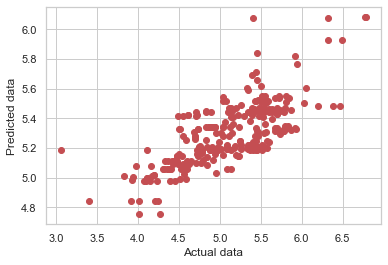

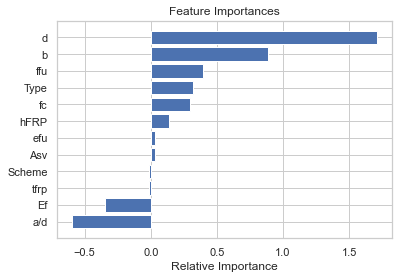

[ 0.88498036  1.70940763  0.1402101  -0.59185308 -0.34639649  0.036284
  0.03430037  0.30027073  0.39470082 -0.01251447  0.32096493 -0.01525578]
Intercept: 3.857101881394718
Coefficients: [ 0.88498036  1.70940763  0.1402101  -0.59185308 -0.34639649  0.036284
  0.03430037  0.30027073  0.39470082 -0.01251447  0.32096493 -0.01525578]


In [13]:
# Print the predicted and actual value for the test set
MLR_y_test_prediction= complex_model_1.predict(X_test)
np.savetxt('MLR_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('MLR_test_actual.csv', y_test, delimiter=',', fmt='%s')

# Print the predicted and actual value for the traing set
MLR_y_train_prediction= complex_model_1.predict(X_train)
np.savetxt('MLR_train_prediction.csv', MLR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('MLR_train_actual.csv', y_train, delimiter=',', fmt='%s')

X_standardized = scaler.transform(X)
MLR_y_pred_entire_data = complex_model_1.predict(X_standardized)
np.savetxt('MLR_entire_prediction.csv', MLR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('MLR_entire_actual.csv', y, delimiter=',', fmt='%s')

import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()

K=X

features = list(X.columns.values)
importances = complex_model_1.coef_
import numpy as np
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)

#equation for Linear Regression
print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

## Ridge Regression

In [14]:
print("For ridge regression")
complex_model_1 = linear_model.Ridge(alpha=0.01, random_state=80, normalize=False, fit_intercept= bool)
complex_model_1.fit(X_train, y_train)

pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()

r = evaluation.shape[0]
evaluation.loc[r] = ['ridge Regression-1','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

r = evaluation2.shape[0]
evaluation2.loc[r] = ['ridge Regression','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['ridge Regression','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['ridge Regression','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['ridge Regression','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['ridge Regression','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['ridge Regression','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['ridge Regression','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['ridge Regression','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]



For ridge regression


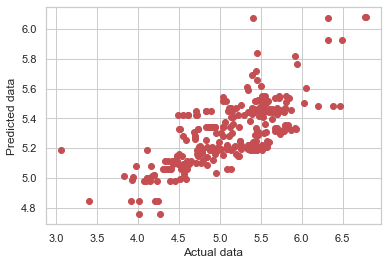

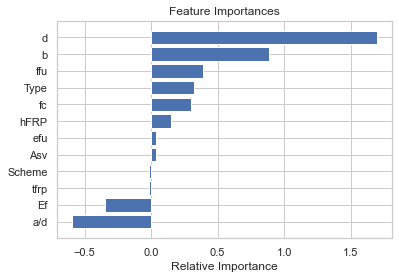

[ 0.88435466  1.69582656  0.15348964 -0.59083098 -0.34302628  0.03699085
  0.03476925  0.30015432  0.38951374 -0.01236374  0.32121537 -0.0161914 ]
Intercept: 3.8583586469538265
Coefficients: [ 0.88435466  1.69582656  0.15348964 -0.59083098 -0.34302628  0.03699085
  0.03476925  0.30015432  0.38951374 -0.01236374  0.32121537 -0.0161914 ]


In [15]:
# Print the predicted and actual value for the test set
MLR_y_test_prediction= complex_model_1.predict(X_test)
np.savetxt('Ridge_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('Ridge_test_actual.csv', y_test, delimiter=',', fmt='%s')

# Print the predicted and actual value for the traing set
MLR_y_train_prediction= complex_model_1.predict(X_train)
np.savetxt('Ridge_train_prediction.csv', MLR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('Ridge_train_actual.csv', y_train, delimiter=',', fmt='%s')

X_standardized = scaler.transform(X)
MLR_y_pred_entire_data = complex_model_1.predict(X_standardized)
np.savetxt('Ridge_entire_prediction.csv', MLR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('Ridge_entire_actual.csv', y, delimiter=',', fmt='%s')

import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()


features = list(X.columns.values)
importances = complex_model_1.coef_
import numpy as np
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)

#equation for Linear Regression
print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

## Lasso Regression

In [16]:
complex_model_1 = linear_model.Lasso(alpha= 0.0001)
complex_model_1.fit(X_train, y_train)

pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()

r = evaluation.shape[0]
evaluation.loc[r] = ['LASSO Regression-1','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

r = evaluation2.shape[0]
evaluation2.loc[r] = ['LASSO Regression','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['LASSO Regression','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['LASSO Regression','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['LASSO Regression','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['LASSO Regression','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['LASSO Regression','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['LASSO Regression','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['LASSO Regression','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]


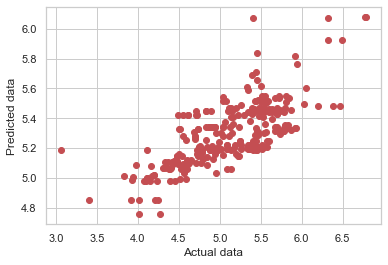

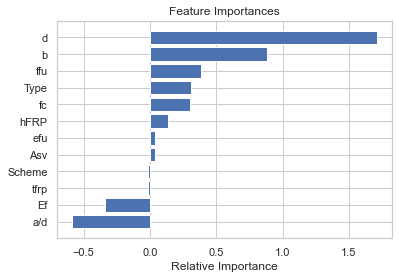

[ 0.87973961  1.70966651  0.13871133 -0.58524962 -0.34141443  0.03722128
  0.03397593  0.30005334  0.38316577 -0.01347594  0.31151541 -0.01395151]
Intercept: 3.8659786093753015
Coefficients: [ 0.87973961  1.70966651  0.13871133 -0.58524962 -0.34141443  0.03722128
  0.03397593  0.30005334  0.38316577 -0.01347594  0.31151541 -0.01395151]


In [17]:
# Print the predicted and actual value for the test set
MLR_y_test_prediction= complex_model_1.predict(X_test)
np.savetxt('Lasso_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('Lasso_test_actual.csv', y_test, delimiter=',', fmt='%s')

# Print the predicted and actual value for the traing set
MLR_y_train_prediction= complex_model_1.predict(X_train)
np.savetxt('Lasso_train_prediction.csv', MLR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('Lasso_train_actual.csv', y_train, delimiter=',', fmt='%s')

X_standardized = scaler.transform(X)
MLR_y_pred_entire_data = complex_model_1.predict(X_standardized)
np.savetxt('Lasso_entire_prediction.csv', MLR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('Lasso_entire_actual.csv', y, delimiter=',', fmt='%s')


import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()


features = list(X.columns.values)
importances = complex_model_1.coef_
import numpy as np
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)

#equation for Linear Regression
print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

## K- nearest Neighbors

In [18]:
complex_model_1 = KNeighborsRegressor(n_neighbors=6, weights='distance', algorithm='auto')
complex_model_1.fit(X_train, y_train)

pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()

r = evaluation.shape[0]
evaluation.loc[r] = ['kNN Regression','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

r = evaluation2.shape[0]
evaluation2.loc[r] = ['kNN Regression','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['kNN Regression','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['kNN Regression','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['kNN Regression','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['kNN Regression','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['kNN Regression','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['kNN Regression','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['kNN Regression','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]




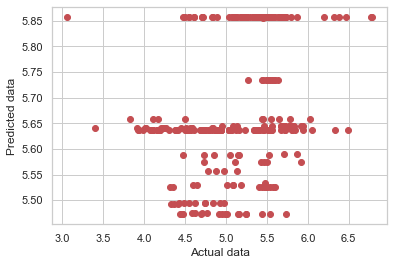

In [19]:
# Print the predicted and actual value for the test set
MLR_y_test_prediction= complex_model_1.predict(X_test)
np.savetxt('KNN_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('KNN_test_actual.csv', y_test, delimiter=',', fmt='%s')

# Print the predicted and actual value for the traing set
MLR_y_train_prediction= complex_model_1.predict(X_train)
np.savetxt('KNN_train_prediction.csv', MLR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('KNN_train_actual.csv', y_train, delimiter=',', fmt='%s')

X_standardized = scaler.transform(X)
MLR_y_pred_entire_data = complex_model_1.predict(X_standardized)
np.savetxt('KNN_entire_prediction.csv', MLR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('KNN_entire_actual.csv', y, delimiter=',', fmt='%s')



import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()




## Support Vector Regression

In [20]:
print("For SVR: ")
from sklearn.svm import SVR
complex_model_1 = SVR(kernel='rbf', C=5, degree=5)
complex_model_1.fit(X_train, y_train)


pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()

r = evaluation.shape[0]
evaluation.loc[r] = ['SVR Regression','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

r = evaluation2.shape[0]
evaluation2.loc[r] = ['SVR','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['SVR','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['SVR','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['SVR','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['SVR','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['SVR','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['SVR','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['SVR','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]





For SVR: 


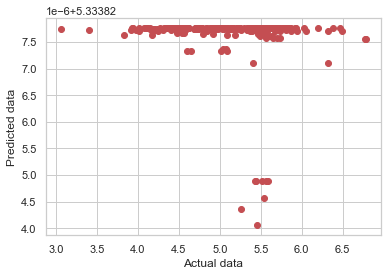

In [21]:
# Print the predicted and actual value for the test set
MLR_y_test_prediction= complex_model_1.predict(X_test)
np.savetxt('SVR_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('SVR_test_actual.csv', y_test, delimiter=',', fmt='%s')

# Print the predicted and actual value for the traing set
MLR_y_train_prediction= complex_model_1.predict(X_train)
np.savetxt('SVR_train_prediction.csv', MLR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('SVR_train_actual.csv', y_train, delimiter=',', fmt='%s')

X_standardized = scaler.transform(X)
MLR_y_pred_entire_data = complex_model_1.predict(X_standardized)
np.savetxt('SVR_entire_prediction.csv', MLR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('SVR_entire_actual.csv', y, delimiter=',', fmt='%s')



import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()




## Decision Tree Regression

In [22]:
print("For Decision Tree regression")
from sklearn.tree import DecisionTreeRegressor
complex_model_1 = DecisionTreeRegressor(random_state=45)
complex_model_1.fit(X_train, y_train)


pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()

r = evaluation.shape[0]
evaluation.loc[r] = ['DT','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

r = evaluation2.shape[0]
evaluation2.loc[r] = ['DT','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['DT','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['DT','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['DT','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['DT','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['DT','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['DT','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['DT','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]


For Decision Tree regression


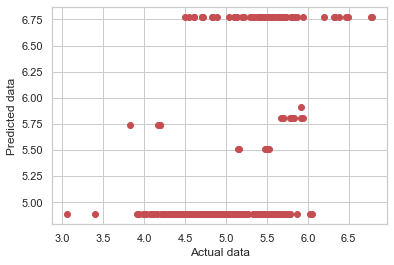

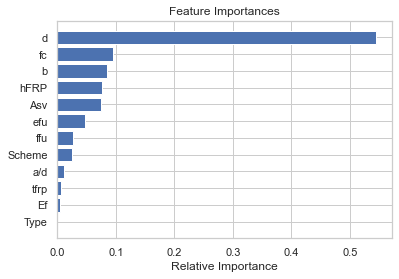

[8.54075364e-02 5.44719511e-01 7.64192226e-02 1.24328676e-02
 5.61095512e-03 4.78553180e-02 7.39796641e-02 9.49947207e-02
 2.77822751e-02 2.50688805e-02 6.17970966e-05 5.66725205e-03]


In [23]:
# Print the predicted and actual value for the test set
MLR_y_test_prediction= complex_model_1.predict(X_test)
np.savetxt('DT_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('DT_test_actual.csv', y_test, delimiter=',', fmt='%s')

# Print the predicted and actual value for the traing set
MLR_y_train_prediction= complex_model_1.predict(X_train)
np.savetxt('DT_train_prediction.csv', MLR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('DT_train_actual.csv', y_train, delimiter=',', fmt='%s')

X_standardized = scaler.transform(X)
MLR_y_pred_entire_data = complex_model_1.predict(X_standardized)
np.savetxt('DT_entire_prediction.csv', MLR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('DT_entire_actual.csv', y, delimiter=',', fmt='%s')

import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()


features = list(X.columns.values)
importances = complex_model_1.feature_importances_
import numpy as np
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)

## Random Forest Regression

In [24]:
print("For Random Forest regression")
from sklearn.ensemble import RandomForestRegressor
complex_model_1 = RandomForestRegressor(random_state=500, n_estimators=400)
complex_model_1.fit(X_train, y_train)

pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()

r = evaluation.shape[0]
evaluation.loc[r] = ['RF','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

r = evaluation2.shape[0]
evaluation2.loc[r] = ['RF','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['RF','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['RF','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['RF','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['RF','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['RF','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['RF','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['RF','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]




For Random Forest regression


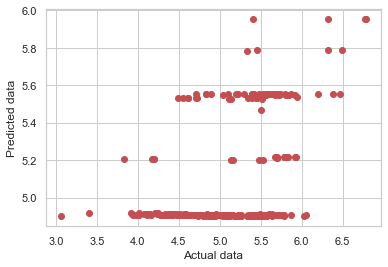

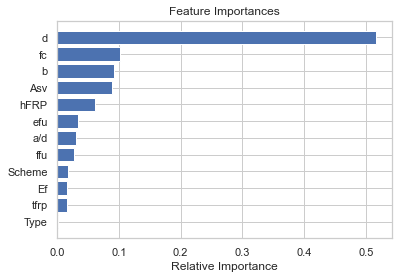

[0.09129699 0.51667539 0.06073352 0.03043583 0.0166218  0.0333553
 0.08821081 0.10167882 0.0264608  0.0174047  0.00070367 0.01642239]


In [25]:
# Print the predicted and actual value for the test set
MLR_y_test_prediction= complex_model_1.predict(X_test)
np.savetxt('RF_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('RF_test_actual.csv', y_test, delimiter=',', fmt='%s')

# Print the predicted and actual value for the traing set
MLR_y_train_prediction= complex_model_1.predict(X_train)
np.savetxt('RF_train_prediction.csv', MLR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('RF_train_actual.csv', y_train, delimiter=',', fmt='%s')

X_standardized = scaler.transform(X)
MLR_y_pred_entire_data = complex_model_1.predict(X_standardized)
np.savetxt('RF_entire_prediction.csv', MLR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('RF_entire_actual.csv', y, delimiter=',', fmt='%s')


import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()


features = list(X.columns.values)
importances = complex_model_1.feature_importances_
import numpy as np
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)


## Random Forest with Optimal Parameter

In [65]:
importances

array([0.09129699, 0.51667539, 0.06073352, 0.03043583, 0.0166218 ,
       0.0333553 , 0.08821081, 0.10167882, 0.0264608 , 0.0174047 ,
       0.00070367, 0.01642239])

In [29]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


## XG Boost Regression

In [20]:
print("For XGBoost regression")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import xgboost as xgb
from xgboost import plot_importance
complex_model_1 = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=3)

complex_model_1.fit(X_train, y_train)
testing=pd.read_csv('D:\\1 Research Project\\Paper on FRP\\Dataset for code\\rectengular\\Rectengular Beam corrected 4.csv');
pred2=complex_model_1.predict(X_test)



pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()

r = evaluation.shape[0]
evaluation.loc[r] = ['XGBOOST Regression','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

r = evaluation2.shape[0]
evaluation2.loc[r] = ['XGBOOST Regression','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['XGBOOST Regression','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['XGBOOST Regression','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['XGBOOST Regression','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['XGBOOST Regression','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['XGBOOST Regression','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['XGBOOST Regression','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['XGBOOST Regression','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]


For XGBoost regression


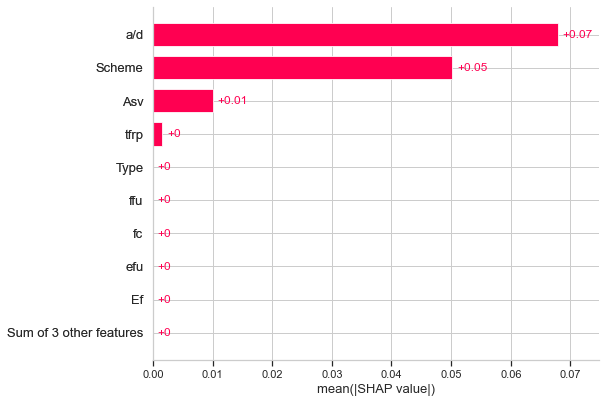

In [21]:
explainer = shap.Explainer(complex_model_1, X)
shap_values = explainer(X)
shap.plots.bar(shap_values)

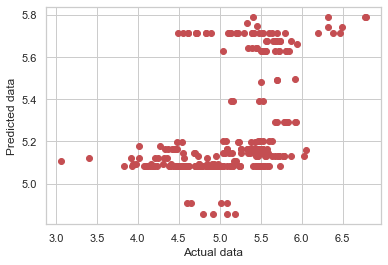

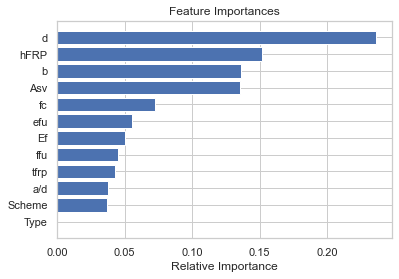

[0.1363529  0.23614755 0.15197189 0.03762662 0.05034012 0.0552074
 0.13525687 0.07253674 0.04537406 0.03663433 0.         0.0425515 ]


In [31]:
# Print the predicted and actual value for the test set
MLR_y_test_prediction= complex_model_1.predict(X_test)
np.savetxt('XgBOOST_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('XgBOOST_test_actual.csv', y_test, delimiter=',', fmt='%s')

# Print the predicted and actual value for the traing set
MLR_y_train_prediction= complex_model_1.predict(X_train)
np.savetxt('XgBOOST_train_prediction.csv', MLR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('XgBOOST_train_actual.csv', y_train, delimiter=',', fmt='%s')

X_standardized = scaler.transform(X)
MLR_y_pred_entire_data = complex_model_1.predict(X_standardized)
np.savetxt('XgBOOST_entire_prediction.csv', MLR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('XgBOOST_entire_actual.csv', y, delimiter=',', fmt='%s')

import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()


features = list(X.columns.values)
importances = complex_model_1.feature_importances_
import numpy as np
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)


### Optimal parameter for XGBOOST

## ADABOOST REGRESSION

In [39]:
from sklearn.ensemble import AdaBoostRegressor
print("For Adaboost regression")
complex_model_1 = AdaBoostRegressor(random_state=30, n_estimators=50)
complex_model_1.fit(X_train, y_train)


pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()

r = evaluation.shape[0]
evaluation.loc[r] = ['ADABOOST Regression','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

r = evaluation2.shape[0]
evaluation2.loc[r] = ['ADABOOST Regression','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['ADABOOST Regression','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['ADABOOST Regression','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['ADABOOST Regression','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['ADABOOST Regression','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['ADABOOST Regression','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['ADABOOST Regression','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['ADABOOST Regression','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]




For Adaboost regression


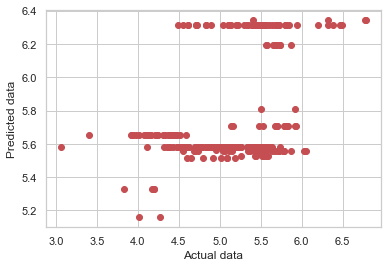

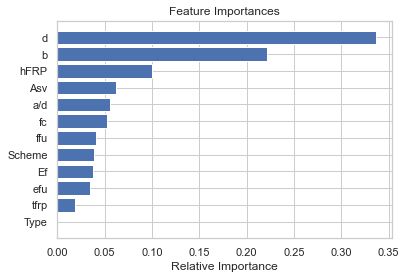

[2.21967710e-01 3.36760650e-01 9.98880379e-02 5.57157902e-02
 3.75093311e-02 3.49884752e-02 6.16979288e-02 5.24562596e-02
 4.14148797e-02 3.88567461e-02 2.50892572e-05 1.87191023e-02]


In [40]:
# Print the predicted and actual value for the test set
MLR_y_test_prediction= complex_model_1.predict(X_test)
np.savetxt('AdaBOOST_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('AdaBOOST_test_actual.csv', y_test, delimiter=',', fmt='%s')

# Print the predicted and actual value for the traing set
MLR_y_train_prediction= complex_model_1.predict(X_train)
np.savetxt('AdaBOOST_train_prediction.csv', MLR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('AdaBOOST_train_actual.csv', y_train, delimiter=',', fmt='%s')

X_standardized = scaler.transform(X)
MLR_y_pred_entire_data = complex_model_1.predict(X_standardized)
np.savetxt('AdaBOOST_entire_prediction.csv', MLR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('AdaBOOST_entire_actual.csv', y, delimiter=',', fmt='%s')

import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()


features = list(X.columns.values)
importances = complex_model_1.feature_importances_
import numpy as np
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)

## CAT BOOST REGRESSION

In [41]:
print("For CatBoost regression")
!pip3 install catboost
from catboost import CatBoostRegressor
complex_model_1 = CatBoostRegressor(iterations=700,learning_rate=0.02,depth=5,eval_metric='RMSE',random_seed = 23,bagging_temperature = 0.2,od_type='Iter',
                             metric_period = 75,
                             od_wait=100)

complex_model_1.fit(X_train, y_train)


# pred = complex_model_1.predict(X_test)
# rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
# r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
# ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
# mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

# rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
# r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
# ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
# mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

# cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

# cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
# cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

# cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
# cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

# cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
# cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

# cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
# cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

# cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
# cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

# cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
# cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

# cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
# cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

# cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
# cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()

# r = evaluation.shape[0]
# evaluation.loc[r] = ['Multiple Regression-1','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
# evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

# r = evaluation2.shape[0]
# evaluation2.loc[r] = ['CATBOOST','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
# evaluation2.loc[r+1] = ['CATBOOST','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
# evaluation2.loc[r+2] = ['CATBOOST','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
# evaluation2.loc[r+3] = ['CATBOOST','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
# evaluation2.loc[r+4] = ['CATBOOST','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
# evaluation2.loc[r+5] = ['CATBOOST','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
# evaluation2.loc[r+6] = ['CATBOOST','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
# evaluation2.loc[r+7] = ['CATBOOST','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]


For CatBoost regression
0:	learn: 0.5575553	total: 136ms	remaining: 1m 35s
75:	learn: 0.3220168	total: 175ms	remaining: 1.44s
150:	learn: 0.2328288	total: 213ms	remaining: 773ms
225:	learn: 0.1925516	total: 250ms	remaining: 525ms
300:	learn: 0.1686600	total: 288ms	remaining: 381ms
375:	learn: 0.1540855	total: 326ms	remaining: 281ms
450:	learn: 0.1428657	total: 364ms	remaining: 201ms
525:	learn: 0.1319234	total: 400ms	remaining: 132ms
600:	learn: 0.1225867	total: 438ms	remaining: 72.2ms
675:	learn: 0.1162429	total: 475ms	remaining: 16.9ms
699:	learn: 0.1141619	total: 487ms	remaining: 0us


In [11]:
from catboost import CatBoostRegressor, Pool
complex_model_1 = CatBoostRegressor(iterations=700,learning_rate=0.02,depth=5,eval_metric='RMSE',random_seed = 23,bagging_temperature = 0.2,od_type='Iter',
                             metric_period = 75,
                             od_wait=100)

complex_model_1.fit(X_train, y_train)
pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)
r = evaluation2.shape[0]
evaluation2.loc[r] = ['CATBOOST','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['CATBOOST','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['CATBOOST','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['CATBOOST','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['CATBOOST','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['CATBOOST','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['CATBOOST','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['CATBOOST','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]




0:	learn: 0.5575553	total: 152ms	remaining: 1m 46s
75:	learn: 0.3220168	total: 192ms	remaining: 1.58s
150:	learn: 0.2328288	total: 229ms	remaining: 832ms
225:	learn: 0.1925516	total: 267ms	remaining: 560ms
300:	learn: 0.1686600	total: 303ms	remaining: 401ms
375:	learn: 0.1540855	total: 338ms	remaining: 291ms
450:	learn: 0.1428657	total: 374ms	remaining: 207ms
525:	learn: 0.1319234	total: 410ms	remaining: 136ms
600:	learn: 0.1225867	total: 448ms	remaining: 73.7ms
675:	learn: 0.1162429	total: 483ms	remaining: 17.2ms
699:	learn: 0.1141619	total: 495ms	remaining: 0us
0:	learn: 0.5687008	total: 922us	remaining: 645ms
75:	learn: 0.3261658	total: 38.2ms	remaining: 313ms
150:	learn: 0.2384750	total: 74.3ms	remaining: 270ms
225:	learn: 0.1962352	total: 111ms	remaining: 233ms
300:	learn: 0.1706471	total: 147ms	remaining: 194ms
375:	learn: 0.1538417	total: 182ms	remaining: 157ms
450:	learn: 0.1413659	total: 220ms	remaining: 122ms
525:	learn: 0.1299858	total: 256ms	remaining: 84.7ms
600:	learn: 0.

450:	learn: 0.1431023	total: 223ms	remaining: 123ms
525:	learn: 0.1313254	total: 259ms	remaining: 85.7ms
600:	learn: 0.1212682	total: 295ms	remaining: 48.6ms
675:	learn: 0.1139608	total: 331ms	remaining: 11.7ms
699:	learn: 0.1121514	total: 343ms	remaining: 0us
0:	learn: 0.5557165	total: 1.47ms	remaining: 1.03s
75:	learn: 0.3235322	total: 43ms	remaining: 353ms
150:	learn: 0.2384968	total: 79.1ms	remaining: 288ms
225:	learn: 0.1959603	total: 115ms	remaining: 241ms
300:	learn: 0.1704600	total: 152ms	remaining: 202ms
375:	learn: 0.1545398	total: 188ms	remaining: 162ms
450:	learn: 0.1427916	total: 228ms	remaining: 126ms
525:	learn: 0.1310835	total: 264ms	remaining: 87.4ms
600:	learn: 0.1222783	total: 301ms	remaining: 49.5ms
675:	learn: 0.1145108	total: 337ms	remaining: 12ms
699:	learn: 0.1124961	total: 349ms	remaining: 0us
0:	learn: 0.5486435	total: 1.32ms	remaining: 924ms
75:	learn: 0.3155676	total: 40ms	remaining: 328ms
150:	learn: 0.2311135	total: 76.3ms	remaining: 277ms
225:	learn: 0.19

0:	learn: 0.5654857	total: 1.35ms	remaining: 946ms
75:	learn: 0.3297497	total: 40.8ms	remaining: 335ms
150:	learn: 0.2384109	total: 77.3ms	remaining: 281ms
225:	learn: 0.1944750	total: 113ms	remaining: 237ms
300:	learn: 0.1688311	total: 149ms	remaining: 197ms
375:	learn: 0.1509742	total: 184ms	remaining: 159ms
450:	learn: 0.1385876	total: 223ms	remaining: 123ms
525:	learn: 0.1282689	total: 259ms	remaining: 85.6ms
600:	learn: 0.1192119	total: 295ms	remaining: 48.5ms
675:	learn: 0.1118241	total: 330ms	remaining: 11.7ms
699:	learn: 0.1096210	total: 341ms	remaining: 0us
0:	learn: 0.5327166	total: 1.46ms	remaining: 1.02s
75:	learn: 0.3049487	total: 46.5ms	remaining: 382ms
150:	learn: 0.2193910	total: 84.2ms	remaining: 306ms
225:	learn: 0.1814064	total: 121ms	remaining: 255ms
300:	learn: 0.1604220	total: 158ms	remaining: 209ms
375:	learn: 0.1471337	total: 194ms	remaining: 167ms
450:	learn: 0.1367253	total: 234ms	remaining: 129ms
525:	learn: 0.1276620	total: 270ms	remaining: 89.4ms
600:	learn

375:	learn: 0.1562315	total: 193ms	remaining: 166ms
450:	learn: 0.1440388	total: 230ms	remaining: 127ms
525:	learn: 0.1321261	total: 267ms	remaining: 88.3ms
600:	learn: 0.1221857	total: 304ms	remaining: 50.1ms
675:	learn: 0.1148360	total: 341ms	remaining: 12.1ms
699:	learn: 0.1126367	total: 352ms	remaining: 0us
0:	learn: 0.5603624	total: 1.51ms	remaining: 1.06s
75:	learn: 0.3232049	total: 45.2ms	remaining: 371ms
150:	learn: 0.2343263	total: 84.5ms	remaining: 307ms
225:	learn: 0.1939052	total: 122ms	remaining: 256ms
300:	learn: 0.1709043	total: 159ms	remaining: 211ms
375:	learn: 0.1559934	total: 197ms	remaining: 169ms
450:	learn: 0.1431023	total: 232ms	remaining: 128ms
525:	learn: 0.1313254	total: 269ms	remaining: 89ms
600:	learn: 0.1212682	total: 305ms	remaining: 50.3ms
675:	learn: 0.1139608	total: 342ms	remaining: 12.2ms
699:	learn: 0.1121514	total: 354ms	remaining: 0us
0:	learn: 0.5557165	total: 1.21ms	remaining: 847ms
75:	learn: 0.3235322	total: 38.9ms	remaining: 319ms
150:	learn: 0

0:	learn: 0.5682208	total: 1.32ms	remaining: 926ms
75:	learn: 0.3277395	total: 41.7ms	remaining: 342ms
150:	learn: 0.2377650	total: 78.8ms	remaining: 286ms
225:	learn: 0.1956864	total: 116ms	remaining: 242ms
300:	learn: 0.1728193	total: 152ms	remaining: 202ms
375:	learn: 0.1583017	total: 189ms	remaining: 163ms
450:	learn: 0.1455014	total: 227ms	remaining: 125ms
525:	learn: 0.1336903	total: 264ms	remaining: 87.3ms
600:	learn: 0.1234625	total: 302ms	remaining: 49.8ms
675:	learn: 0.1169898	total: 339ms	remaining: 12.1ms
699:	learn: 0.1152103	total: 351ms	remaining: 0us
0:	learn: 0.5654857	total: 1.39ms	remaining: 972ms
75:	learn: 0.3297497	total: 43.3ms	remaining: 356ms
150:	learn: 0.2384109	total: 80.6ms	remaining: 293ms
225:	learn: 0.1944750	total: 133ms	remaining: 279ms
300:	learn: 0.1688311	total: 170ms	remaining: 225ms
375:	learn: 0.1509742	total: 208ms	remaining: 180ms
450:	learn: 0.1385876	total: 245ms	remaining: 136ms
525:	learn: 0.1282689	total: 282ms	remaining: 93.4ms
600:	learn

450:	learn: 0.1365503	total: 218ms	remaining: 120ms
525:	learn: 0.1253594	total: 255ms	remaining: 84.5ms
600:	learn: 0.1169208	total: 292ms	remaining: 48.1ms
675:	learn: 0.1112257	total: 329ms	remaining: 11.7ms
699:	learn: 0.1093532	total: 341ms	remaining: 0us
0:	learn: 0.5576415	total: 992us	remaining: 694ms
75:	learn: 0.3203957	total: 42ms	remaining: 345ms
150:	learn: 0.2363041	total: 78.4ms	remaining: 285ms
225:	learn: 0.1949916	total: 114ms	remaining: 240ms
300:	learn: 0.1703560	total: 151ms	remaining: 201ms
375:	learn: 0.1562315	total: 188ms	remaining: 162ms
450:	learn: 0.1440388	total: 227ms	remaining: 125ms
525:	learn: 0.1321261	total: 264ms	remaining: 87.4ms
600:	learn: 0.1221857	total: 301ms	remaining: 49.6ms
675:	learn: 0.1148360	total: 338ms	remaining: 12ms
699:	learn: 0.1126367	total: 350ms	remaining: 0us
0:	learn: 0.5603624	total: 1.19ms	remaining: 834ms
75:	learn: 0.3232049	total: 43.9ms	remaining: 360ms
150:	learn: 0.2343263	total: 81.6ms	remaining: 297ms
225:	learn: 0.1

0:	learn: 0.5624017	total: 1.25ms	remaining: 872ms
75:	learn: 0.3257667	total: 44.1ms	remaining: 362ms
150:	learn: 0.2389446	total: 82ms	remaining: 298ms
225:	learn: 0.1973856	total: 119ms	remaining: 250ms
300:	learn: 0.1719355	total: 156ms	remaining: 207ms
375:	learn: 0.1559355	total: 193ms	remaining: 166ms
450:	learn: 0.1436686	total: 230ms	remaining: 127ms
525:	learn: 0.1330036	total: 268ms	remaining: 88.6ms
600:	learn: 0.1233176	total: 305ms	remaining: 50.3ms
675:	learn: 0.1154024	total: 343ms	remaining: 12.2ms
699:	learn: 0.1131568	total: 355ms	remaining: 0us
0:	learn: 0.5682208	total: 1.32ms	remaining: 927ms
75:	learn: 0.3277395	total: 40.4ms	remaining: 331ms
150:	learn: 0.2377650	total: 78ms	remaining: 284ms
225:	learn: 0.1956864	total: 115ms	remaining: 242ms
300:	learn: 0.1728193	total: 154ms	remaining: 204ms
375:	learn: 0.1583017	total: 191ms	remaining: 164ms
450:	learn: 0.1455014	total: 230ms	remaining: 127ms
525:	learn: 0.1336903	total: 266ms	remaining: 88.2ms
600:	learn: 0.

450:	learn: 0.1345541	total: 196ms	remaining: 108ms
525:	learn: 0.1134156	total: 229ms	remaining: 75.7ms
600:	learn: 0.0934818	total: 261ms	remaining: 42.9ms
675:	learn: 0.0772885	total: 293ms	remaining: 10.4ms
699:	learn: 0.0728760	total: 303ms	remaining: 0us
0:	learn: 0.5618492	total: 1.15ms	remaining: 805ms
75:	learn: 0.3491579	total: 35.1ms	remaining: 288ms
150:	learn: 0.2486390	total: 65.7ms	remaining: 239ms
225:	learn: 0.1884138	total: 96.6ms	remaining: 203ms
300:	learn: 0.1526098	total: 129ms	remaining: 171ms
375:	learn: 0.1333897	total: 160ms	remaining: 138ms
450:	learn: 0.1130277	total: 192ms	remaining: 106ms
525:	learn: 0.0938648	total: 224ms	remaining: 74ms
600:	learn: 0.0797169	total: 256ms	remaining: 42.1ms
675:	learn: 0.0712918	total: 287ms	remaining: 10.2ms
699:	learn: 0.0696113	total: 297ms	remaining: 0us
0:	learn: 0.6431039	total: 1.01ms	remaining: 704ms
75:	learn: 0.4003956	total: 36.3ms	remaining: 298ms
150:	learn: 0.2853405	total: 67.5ms	remaining: 245ms
225:	learn:

0:	learn: 0.6076740	total: 1.13ms	remaining: 790ms
75:	learn: 0.4051109	total: 35.9ms	remaining: 295ms
150:	learn: 0.3025436	total: 67.3ms	remaining: 245ms
225:	learn: 0.2388417	total: 98.3ms	remaining: 206ms
300:	learn: 0.2013724	total: 130ms	remaining: 173ms
375:	learn: 0.1702770	total: 162ms	remaining: 140ms
450:	learn: 0.1457097	total: 194ms	remaining: 107ms
525:	learn: 0.1204393	total: 228ms	remaining: 75.5ms
600:	learn: 0.1008341	total: 263ms	remaining: 43.4ms
675:	learn: 0.0810338	total: 295ms	remaining: 10.5ms
699:	learn: 0.0755697	total: 306ms	remaining: 0us
0:	learn: 0.5953900	total: 1.08ms	remaining: 753ms
75:	learn: 0.4015227	total: 34.5ms	remaining: 283ms
150:	learn: 0.3047479	total: 66.1ms	remaining: 240ms
225:	learn: 0.2421644	total: 97.6ms	remaining: 205ms
300:	learn: 0.2010119	total: 129ms	remaining: 171ms
375:	learn: 0.1720133	total: 161ms	remaining: 139ms
450:	learn: 0.1498946	total: 194ms	remaining: 107ms
525:	learn: 0.1249304	total: 226ms	remaining: 74.8ms
600:	lea

450:	learn: 0.1445086	total: 200ms	remaining: 110ms
525:	learn: 0.1211575	total: 232ms	remaining: 76.7ms
600:	learn: 0.1023749	total: 264ms	remaining: 43.6ms
675:	learn: 0.0881655	total: 297ms	remaining: 10.5ms
699:	learn: 0.0836983	total: 308ms	remaining: 0us
0:	learn: 0.6333967	total: 1.04ms	remaining: 728ms
75:	learn: 0.4041860	total: 38.3ms	remaining: 314ms
150:	learn: 0.2958075	total: 70.5ms	remaining: 256ms
225:	learn: 0.2343377	total: 103ms	remaining: 215ms
300:	learn: 0.1938795	total: 134ms	remaining: 178ms
375:	learn: 0.1626802	total: 166ms	remaining: 143ms
450:	learn: 0.1345541	total: 199ms	remaining: 110ms
525:	learn: 0.1134156	total: 231ms	remaining: 76.3ms
600:	learn: 0.0934818	total: 262ms	remaining: 43.1ms
675:	learn: 0.0772885	total: 293ms	remaining: 10.4ms
699:	learn: 0.0728760	total: 304ms	remaining: 0us
0:	learn: 0.5618492	total: 593us	remaining: 415ms
75:	learn: 0.3491579	total: 34.8ms	remaining: 286ms
150:	learn: 0.2486390	total: 66.2ms	remaining: 241ms
225:	learn:

0:	learn: 0.6336365	total: 764us	remaining: 534ms
75:	learn: 0.4044893	total: 34.2ms	remaining: 281ms
150:	learn: 0.3012787	total: 65.5ms	remaining: 238ms
225:	learn: 0.2381103	total: 98.3ms	remaining: 206ms
300:	learn: 0.2017518	total: 130ms	remaining: 172ms
375:	learn: 0.1712010	total: 162ms	remaining: 140ms
450:	learn: 0.1385845	total: 194ms	remaining: 107ms
525:	learn: 0.1154882	total: 227ms	remaining: 75.2ms
600:	learn: 0.0957537	total: 259ms	remaining: 42.7ms
675:	learn: 0.0861089	total: 291ms	remaining: 10.3ms
699:	learn: 0.0823780	total: 302ms	remaining: 0us
0:	learn: 0.6076740	total: 711us	remaining: 497ms
75:	learn: 0.4051109	total: 35.9ms	remaining: 295ms
150:	learn: 0.3025436	total: 66.9ms	remaining: 243ms
225:	learn: 0.2388417	total: 97.4ms	remaining: 204ms
300:	learn: 0.2013724	total: 143ms	remaining: 190ms
375:	learn: 0.1702770	total: 174ms	remaining: 150ms
450:	learn: 0.1457097	total: 207ms	remaining: 114ms
525:	learn: 0.1204393	total: 239ms	remaining: 79ms
600:	learn: 

525:	learn: 0.1195409	total: 227ms	remaining: 75.2ms
600:	learn: 0.0955080	total: 260ms	remaining: 42.8ms
675:	learn: 0.0814336	total: 291ms	remaining: 10.3ms
699:	learn: 0.0779250	total: 301ms	remaining: 0us
0:	learn: 0.6260423	total: 1.1ms	remaining: 767ms
75:	learn: 0.4011765	total: 38.3ms	remaining: 315ms
150:	learn: 0.2946887	total: 71.8ms	remaining: 261ms
225:	learn: 0.2360447	total: 104ms	remaining: 217ms
300:	learn: 0.1959311	total: 135ms	remaining: 180ms
375:	learn: 0.1660792	total: 168ms	remaining: 145ms
450:	learn: 0.1445086	total: 201ms	remaining: 111ms
525:	learn: 0.1211575	total: 235ms	remaining: 77.8ms
600:	learn: 0.1023749	total: 267ms	remaining: 44ms
675:	learn: 0.0881655	total: 299ms	remaining: 10.6ms
699:	learn: 0.0836983	total: 310ms	remaining: 0us
0:	learn: 0.6333967	total: 1.05ms	remaining: 737ms
75:	learn: 0.4041860	total: 50.9ms	remaining: 418ms
150:	learn: 0.2958075	total: 82ms	remaining: 298ms
225:	learn: 0.2343377	total: 113ms	remaining: 237ms
300:	learn: 0.1

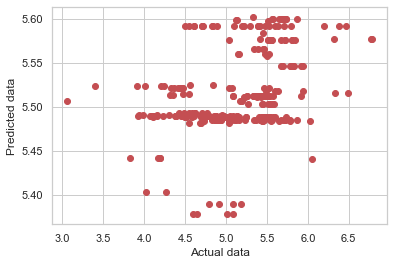

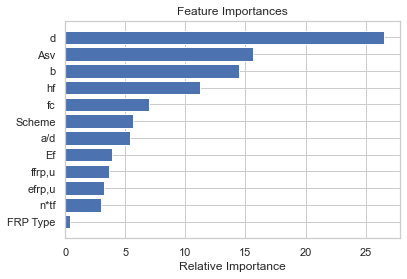

[14.43165906 26.52136421 11.21011371  5.40868897  3.90922877  3.26399406
 15.62349481  6.9794265   3.64767565  5.6214569   0.39593745  2.9869599 ]


In [12]:
# Print the predicted and actual value for the test set
MLR_y_test_prediction= complex_model_1.predict(X_test)
np.savetxt('CatBOOST_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('CatBOOST_test_actual.csv', y_test, delimiter=',', fmt='%s')

# Print the predicted and actual value for the traing set
MLR_y_train_prediction= complex_model_1.predict(X_train)
np.savetxt('CatBOOST_train_prediction.csv', MLR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('CatBOOST_train_actual.csv', y_train, delimiter=',', fmt='%s')

X_standardized = scaler.transform(X)
MLR_y_pred_entire_data = complex_model_1.predict(X_standardized)
np.savetxt('CatBOOST_entire_prediction.csv', MLR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('CatBOOST_entire_actual.csv', y, delimiter=',', fmt='%s')

import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()


features = list(X.columns.values)
importances = complex_model_1.feature_importances_
import numpy as np
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)


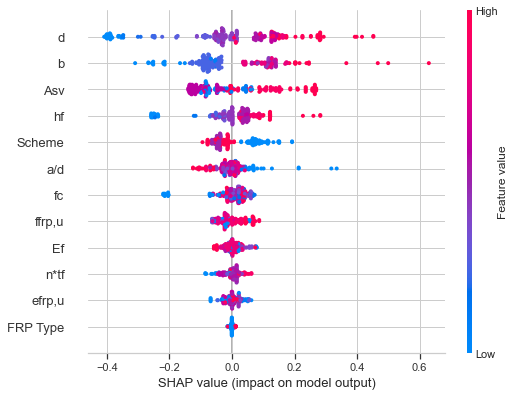

In [13]:
import shap
shap_values = complex_model_1.get_feature_importance(Pool(X_train, label=y_train) , type="ShapValues")
 
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.initjs()
shap.force_plot(expected_value, shap_values[0,:], X_train.iloc[0,:])
shap.summary_plot(shap_values, X_train)

In [25]:
import shap
shap_values = complex_model_1.get_feature_importance(Pool(X_train, label=y_train) , type="ShapValues")
 
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.initjs()
shap.force_plot(expected_value, shap_values[0,:], X_train.iloc[0,:])

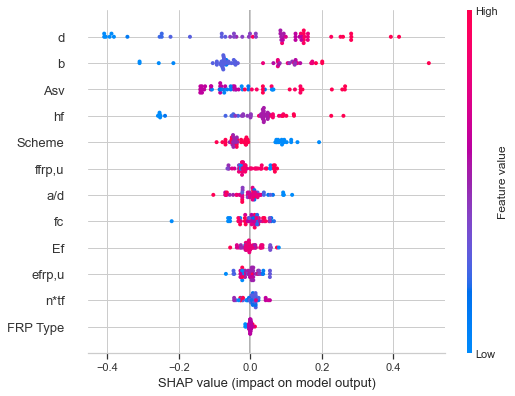

In [14]:
shap_values = complex_model_1.get_feature_importance(Pool(X_test, label=y_test) , type="ShapValues")
 
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.initjs()
shap.force_plot(expected_value, shap_values[0,:], X_test.iloc[0,:])
shap.summary_plot(shap_values, X_test)

In [74]:
print("For ANN regression")
from sklearn.neural_network import MLPRegressor

complex_model_1 = MLPRegressor(random_state=1, max_iter=200).fit(X_train, y_train)


pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()

r = evaluation.shape[0]
evaluation.loc[r] = ['ANN Regression-1','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

r = evaluation2.shape[0]
evaluation2.loc[r] = ['ANN','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['ANN','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['ANN','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['ANN','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['ANN','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['ANN','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['ANN','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['ANN','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]



For ANN regression


C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


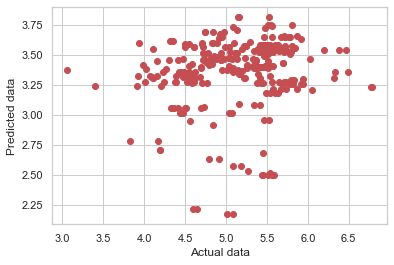

In [75]:

# Print the predicted and actual value for the test set
MLR_y_test_prediction= complex_model_1.predict(X_test)
np.savetxt('ANN_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('ANN_test_actual.csv', y_test, delimiter=',', fmt='%s')

# Print the predicted and actual value for the traing set
MLR_y_train_prediction= complex_model_1.predict(X_train)
np.savetxt('ANN_train_prediction.csv', MLR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('ANN_train_actual.csv', y_train, delimiter=',', fmt='%s')

X_standardized = scaler.transform(X)
MLR_y_pred_entire_data = complex_model_1.predict(X_standardized)
np.savetxt('ANN_entire_prediction.csv', MLR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('ANN_entire_actual.csv', y, delimiter=',', fmt='%s')

import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()


In [76]:
evaluation.to_csv("model_results_with_cat.csv")
evaluation2.to_csv("cross_val_results_with_cat.csv")

## From the models, XGBOOST is the one having highest accuracy